In [ ]:
def split_dataset(x_dataset, y_dataset, ratio):
    arr = np.arange(x_dataset.size)
    np.random.shuffle(arr)
    num_train = int(ratio * x_dataset.size)
    x_train = x_dataset[arr[0:num_train]]
    x_test = x_dataset[arr[num_train:x_dataset.size]]
    y_train = y_dataset[arr[0:num_train]]
    y_test = y_dataset[arr[num_train:x_dataset.size]]
    return x_train, x_test, y_train, y_test

In [2]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [3]:
learning_rate = 0.001
training_epochs = 1000
reg_lambda = float(0)
num_coeffs = 9

In [4]:
x_dataset = np.linspace(-1, 1, 100)

In [5]:
y_dataset_params = [0.] * num_coeffs
y_dataset_params[2] = 1
y_dataset = 0
for i in range(num_coeffs):
    y_dataset += y_dataset_params[i] * np.power(x_dataset, i)
y_dataset += np.random.randn(*x_dataset.shape) * 0.3

In [6]:
(x_train, x_test, y_train, y_test) = split_dataset(x_dataset, y_dataset, 0.7)

In [7]:
X = tf.constant(x_train, dtype=tf.float32)
Y = tf.constant(y_train, dtype=tf.float32)
w = tf.Variable([0.] * num_coeffs, name='parameters', dtype=tf.float32)

In [8]:
@tf.function
def model(X, w):
    terms = []
    for i in range(num_coeffs):
        term = tf.multiply(w[i], tf.pow(X, i))
        terms.append(term)    
    return tf.add_n(terms)

In [9]:
@tf.function
def y_model():
    return model(X, w)

In [10]:
@tf.function
def cost():
    w_sqr = tf.square(w)
    w_red = tf.reduce_sum(w_sqr)
    m_lmd_w_sqr = tf.multiply(tf.convert_to_tensor(reg_lambda, dtype=tf.float32), w_red)
    y_y_model_sqr = tf.reduce_sum(tf.square(Y-y_model()))
    sum_y_model_sqr_reglambda_w_sqr = tf.add(y_y_model_sqr, m_lmd_w_sqr)
    return tf.math.divide(sum_y_model_sqr_reglambda_w_sqr, 2*x_train.size)

In [11]:
train_op = tf.keras.optimizers.SGD(learning_rate)

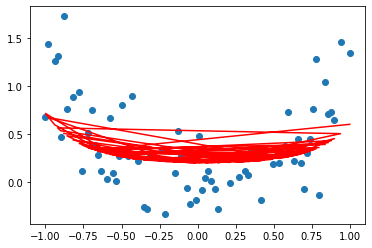

reg lambda 0.0
final cost tf.Tensor(
[ 0.2029361  -0.0202144   0.15661752 -0.01458375  0.12014726 -0.01203132
  0.09734699 -0.01000996  0.08186473], shape=(9,), dtype=float32)


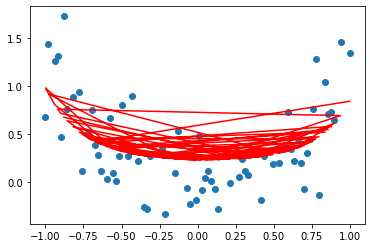

reg lambda 0.010101010101010102
final cost tf.Tensor(
[ 0.23320514 -0.02700766  0.2271991  -0.01811765  0.17981575 -0.01406829
  0.14736785 -0.01075074  0.12442288], shape=(9,), dtype=float32)


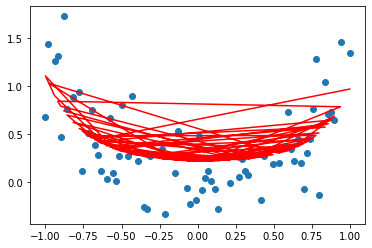

reg lambda 0.020202020202020204
final cost tf.Tensor(
[ 0.22004445 -0.02958449  0.2691645  -0.0179927   0.21767199 -0.01271516
  0.17957383 -0.00831332  0.15178682], shape=(9,), dtype=float32)


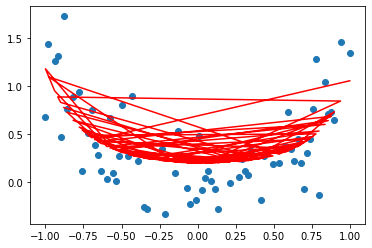

reg lambda 0.030303030303030304
final cost tf.Tensor(
[ 0.19872303 -0.03096177  0.29946133 -0.01665458  0.24549012 -0.01015271
  0.20312157 -0.00470053  0.17153193], shape=(9,), dtype=float32)


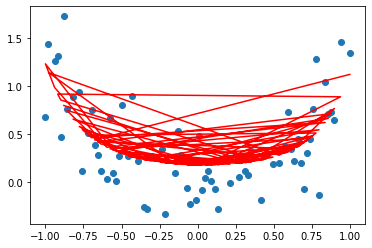

reg lambda 0.04040404040404041
final cost tf.Tensor(
[ 0.17835243 -0.03216136  0.32352188 -0.01497065  0.26731807 -0.00716652
  0.22128266 -0.00063722  0.18643261], shape=(9,), dtype=float32)


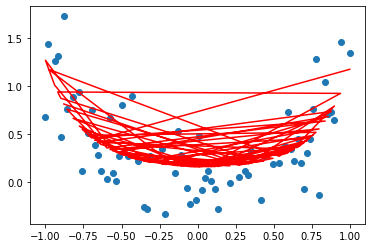

reg lambda 0.05050505050505051
final cost tf.Tensor(
[ 0.16086476 -0.03351882  0.3434204  -0.01326718  0.28489244 -0.00406854
  0.23554067  0.00358152  0.19778845], shape=(9,), dtype=float32)


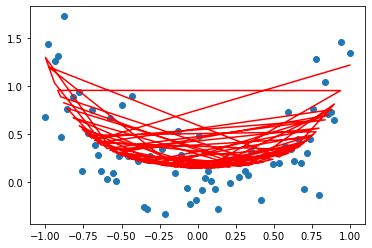

reg lambda 0.06060606060606061
final cost tf.Tensor(
[ 0.14630243 -0.03511949  0.36018455 -0.01166877  0.29918626 -0.00099391
  0.24676871  0.00782054  0.20638412], shape=(9,), dtype=float32)


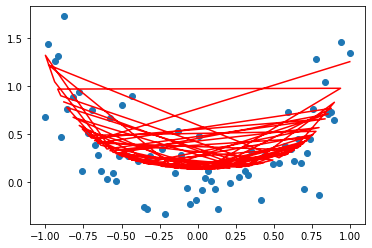

reg lambda 0.07070707070707072
final cost tf.Tensor(
[ 0.13427602 -0.03695476  0.3744647  -0.01021881  0.31086582  0.00199544
  0.25558057  0.01201166  0.21277976], shape=(9,), dtype=float32)


In [12]:
iters = 0
for reg_lambda in np.linspace(0, 1, 100):
    iters += 1
    for epoch in range(training_epochs):
        train_op.minimize(cost, w)
    final_cost = w.value()
    
    # Print the first 8 attempts (for illustration)
    if iters in range(9):
        plt.scatter(x_train, y_train)

        y1 = 0
        for i in range(num_coeffs):
            y1 += final_cost[i] * np.power(X, i)

        plt.plot(x_train, y1, 'r')
        plt.show()
        
        print('reg lambda', reg_lambda)
        print('final cost', final_cost)

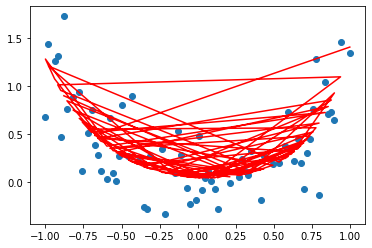

Final result


In [14]:
plt.scatter(x_train, y_train)

y1 = 0
for i in range(num_coeffs):
    y1 += final_cost[i] * np.power(X, i)

plt.plot(x_train, y1, 'r')
plt.show()
print("Final result")